In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("development.csv",sep=",")

In [3]:
print(df.shape)
#Id column has 9854 unique values so it can be considered as index
df.set_index("Id",inplace=True)

(9854, 10)


In [4]:
for col in df.columns[4:7]:
    df.rename(columns= {col: col.title().strip().replace(" ","")},inplace=True)
df.describe()

,path,speakerId,action,object,Self-ReportedFluencyLevel,FirstLanguageSpoken,CurrentLanguageUsedForWork/School,gender,ageRange
count,9854,9854,9854,9854,9854,9854,9854,9854,9854
unique,9854,87,5,5,4,5,4,2,3
top,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0a312...,R3mXwwoaX9IoRVKe,increase,volume,native,English (United States),English (United States),male,22-40
freq,1,183,3823,5000,9444,9642,9598,5265,7496


In [5]:
dfEva = pd.read_csv("evaluation.csv",sep=",")

In [6]:
print(dfEva.shape)
dfEva.set_index("Id",inplace=True)

(1455, 8)


In [7]:
for col in dfEva.columns[2:5]:
    dfEva.rename(columns= {col: col.title().strip().replace(" ","")},inplace=True)
dfEva.describe()

,path,speakerId,Self-ReportedFluencyLevel,FirstLanguageSpoken,CurrentLanguageUsedForWork/School,gender,ageRange
count,1455,1455,1455,1455,1455,1455,1455
unique,1455,10,1,1,1,2,2
top,dsl_data/audio/speakers/NgQEvO2x7Vh3xy2xz/f53c...,7B4XmNppyrCK977p,native,English (United States),English (United States),female,22-40
freq,1,183,1455,1455,1455,773,907


### Control the features' common values in Development and Evaluation

In [8]:
for i in ["speakerId","Self-ReportedFluencyLevel","FirstLanguageSpoken", "CurrentLanguageUsedForWork/School", "gender",	"ageRange"]:
    print(f"For catergory '{i}', common elements in Development and Evaluation ----> {np.intersect1d(np.unique(df[i]),np.unique(dfEva[i]))}")
#we can eliminate speakerId feature. we cannot predict the intent by evaluation's "speakerId" since there is no common value that exist in both development and evaluation

For catergory 'speakerId', common elements in Development and Evaluation ----> []
For catergory 'Self-ReportedFluencyLevel', common elements in Development and Evaluation ----> ['native']
For catergory 'FirstLanguageSpoken', common elements in Development and Evaluation ----> ['English (United States)']
For catergory 'CurrentLanguageUsedForWork/School', common elements in Development and Evaluation ----> ['English (United States)']
For catergory 'gender', common elements in Development and Evaluation ----> ['female' 'male']
For catergory 'ageRange', common elements in Development and Evaluation ----> ['22-40' '41-65']


In [9]:
df.drop("speakerId",axis=1,inplace=True)
dfEva.drop("speakerId",axis=1,inplace=True)

### Merge action and objects and their percentage in the database

In [10]:
df["intent"] = df["action"]+df["object"]
df.drop(["action","object"],axis=1,inplace=True)
print(round(df["intent"].value_counts()/len(df["intent"])*100,2))

increasevolume         26.53
decreasevolume         24.21
increaseheat           12.27
decreaseheat           12.07
change languagenone    11.29
activatemusic           8.03
deactivatelights        5.60
Name: intent, dtype: float64


### Other features plot

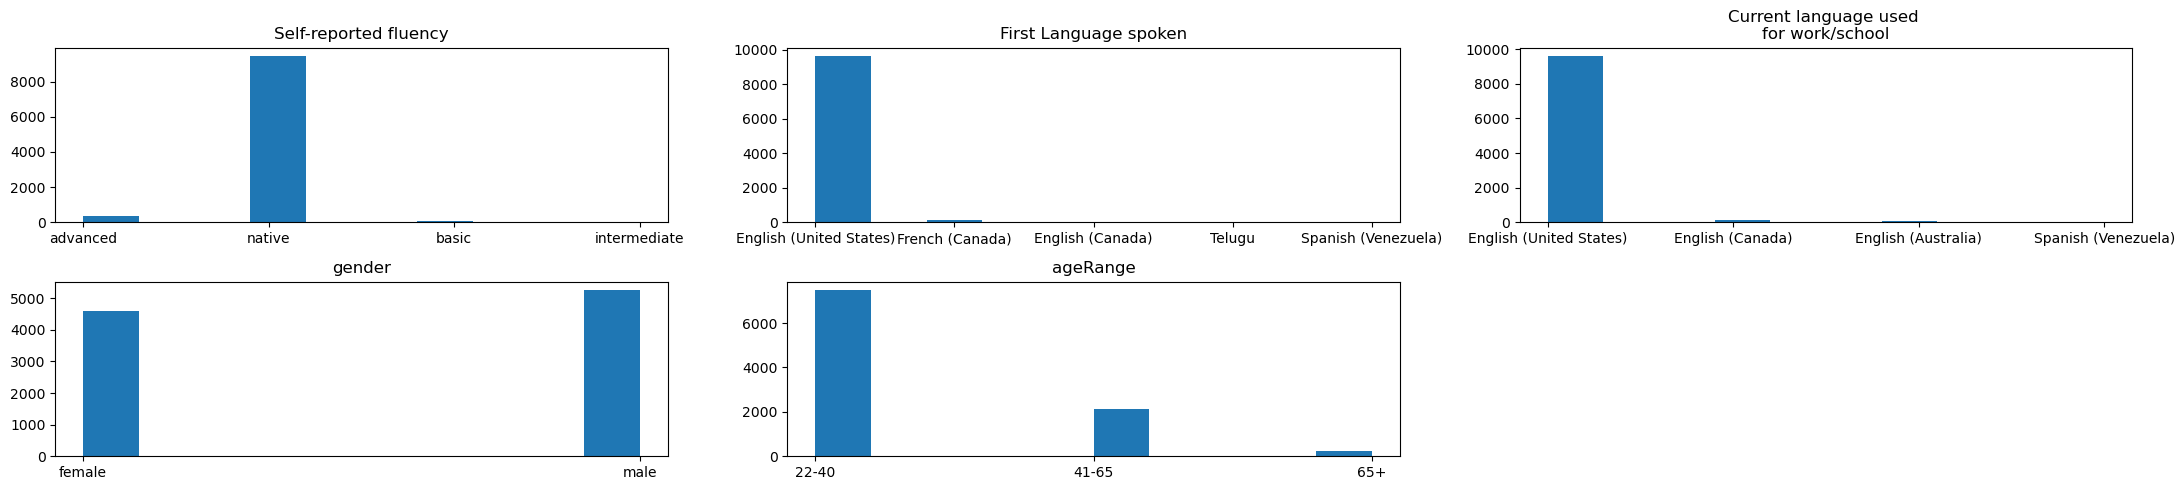

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
#Features to check: Self-reported fluency, First Language spoken, Current language used for work/school, gender, ageRange
figure, axis = plt.subplots(2,3,figsize=(22,5))
figure.delaxes(axis[1,2])
axis[0,0].set_title("Self-reported fluency")
axis[0,0].hist(df.iloc[:,1])

axis[0,1].set_title("First Language spoken")
axis[0,1].hist(df.iloc[:,2])

axis[0,2].set_title("Current language used \nfor work/school")
axis[0,2].hist(df.iloc[:,3])

axis[1,0].set_title("gender")
axis[1,0].hist(df.iloc[:,4])

axis[1,1].set_title("ageRange")
axis[1,1].hist(df.iloc[:,5])
figure.tight_layout() 

### Self-Reported Fluency Level

In [12]:
print(df["Self-ReportedFluencyLevel"].value_counts()/len(df)*100)
df["Self-ReportedFluencyLevel"].replace(to_replace=["advanced","intermediate","basic"],value=["otherFluency","otherFluency","otherFluency"],inplace=True)
print("--------------------\nAfter preprocessing")
print(df["Self-ReportedFluencyLevel"].value_counts()/len(df)*100)

native          95.839253
advanced         3.511264
basic            0.568297
intermediate     0.081185
Name: Self-ReportedFluencyLevel, dtype: float64
--------------------
After preprocessing
native          95.839253
otherFluency     4.160747
Name: Self-ReportedFluencyLevel, dtype: float64


### First Language Spoken

In [13]:
print(df["FirstLanguageSpoken"].value_counts()/len(df)*100)
df["FirstLanguageSpoken"].replace(to_replace=["French (Canada)","Spanish (Venezuela)","Telugu","English (Canada)"],
           value=["otherFirstLanguage","otherFirstLanguage","otherFirstLanguage","otherFirstLanguage"],inplace=True)
print("--------------------\nAfter preprocessing")
print(df["FirstLanguageSpoken"].value_counts()/len(df)*100)

English (United States)    97.848589
French (Canada)             1.501928
Spanish (Venezuela)         0.355186
Telugu                      0.213111
English (Canada)            0.081185
Name: FirstLanguageSpoken, dtype: float64
--------------------
After preprocessing
English (United States)    97.848589
otherFirstLanguage          2.151411
Name: FirstLanguageSpoken, dtype: float64


### Current Language Used for Work/School

In [14]:
print(df["CurrentLanguageUsedForWork/School"].value_counts()/len(df)*100)
df["CurrentLanguageUsedForWork/School"].replace(to_replace=["English (Canada)","English (Australia)","Spanish (Venezuela)"],
                                                value=["otherCurrentLanguage","otherCurrentLanguage","otherCurrentLanguage"],inplace=True)
print("--------------------\nAfter preprocessing")
print(df["CurrentLanguageUsedForWork/School"].value_counts()/len(df)*100)

English (United States)    97.402070
English (Canada)            1.583113
English (Australia)         0.659631
Spanish (Venezuela)         0.355186
Name: CurrentLanguageUsedForWork/School, dtype: float64
--------------------
After preprocessing
English (United States)    97.40207
otherCurrentLanguage        2.59793
Name: CurrentLanguageUsedForWork/School, dtype: float64


### Gender

In [15]:
#No need to preprocess gender since it is distrubited in a balanced way

### Age Range

In [16]:
print(df["ageRange"].value_counts()/len(df)*100)
df.replace(to_replace=["41-65","65+"],value=["40+","40+"],inplace=True)
print("--------------------\nAfter preprocessing")
print(df["ageRange"].value_counts()/len(df)*100)

22-40    76.070631
41-65    21.463365
65+       2.466004
Name: ageRange, dtype: float64
--------------------
After preprocessing
22-40    76.070631
40+      23.929369
Name: ageRange, dtype: float64


### After preprocessing, distrubiton of features

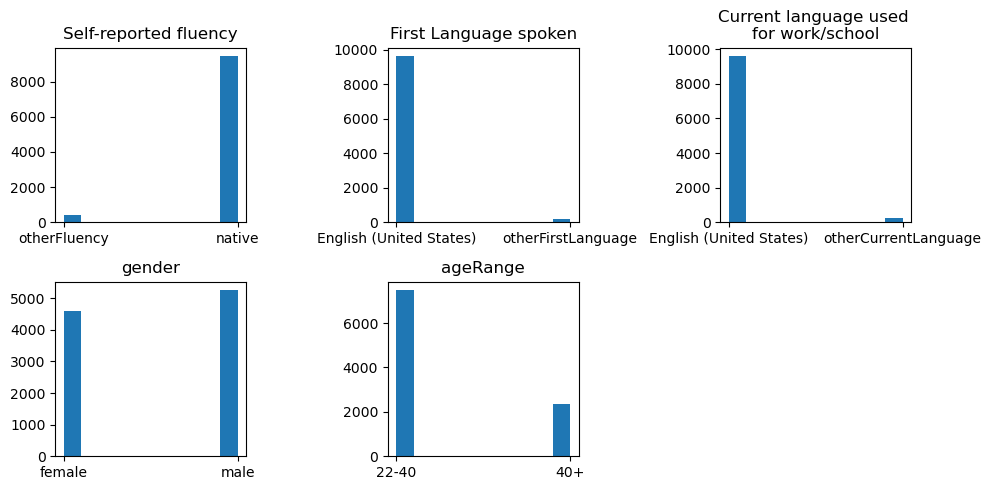

In [17]:
#Features to check: Self-reported fluency, First Language spoken, Current language used for work/school, gender, ageRange
figure, axis = plt.subplots(2,3,figsize=(10,5))
figure.delaxes(axis[1,2])
axis[0,0].set_title("Self-reported fluency")
axis[0,0].hist(df.iloc[:,1])

axis[0,1].set_title("First Language spoken")
axis[0,1].hist(df.iloc[:,2])

axis[0,2].set_title("Current language used \nfor work/school")
axis[0,2].hist(df.iloc[:,3])

axis[1,0].set_title("gender")
axis[1,0].hist(df.iloc[:,4])

axis[1,1].set_title("ageRange")
axis[1,1].hist(df.iloc[:,5])
figure.tight_layout() 

### Reading audio files with scipy and control their sampling rates and sample widths

In [18]:
import scipy.io.wavfile as wavfile
import numpy as np
sw_list = []
sr_list = []
durations = []

for i in range(len(df)):
    sr, data = wavfile.read("C:/Users/Koparan/Desktop/DataPolito/DataScienceLab/project/"+df.iloc[i,0])
    sw_list.append(data.dtype.itemsize)
    sr_list.append(sr)
    durations.append(len(data)/sr)
print(pd.DataFrame(sw_list).value_counts())
print(pd.DataFrame(sr_list).value_counts())

2    9854
dtype: int64
16000    9554
22050     300
dtype: int64


### Plot duration distribution

2.64


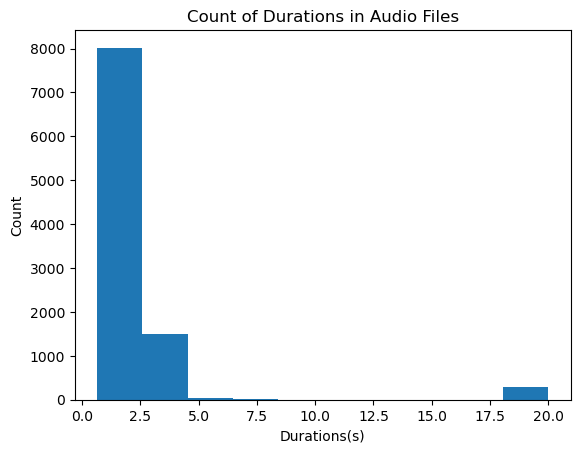

In [19]:
plt.hist(durations)
plt.title("Histogram of Durations in Audio Files")
plt.xlabel("Durations(s)")
plt.ylabel("Count")
print(round(sum(durations)/len(durations),2))

### Using librosa to read audio files with constant sampling rate 

In [20]:
#import sys
#!{sys.executable} -m pip install librosa
import librosa
srdesired = 16000
dataAudio = []
sr_control = []
for i in range(len(df)):
    data, sr = librosa.load("C:/Users/Koparan/Desktop/DataPolito/DataScienceLab/project/"+df.iloc[i,0],sr=srdesired)
    sr_control.append(sr)
    dataAudio.append(data)

In [21]:
pd.DataFrame(sr_control).value_counts()

16000    9854
dtype: int64

### Longest Audio Plot

Duration of longest audio: 20.0


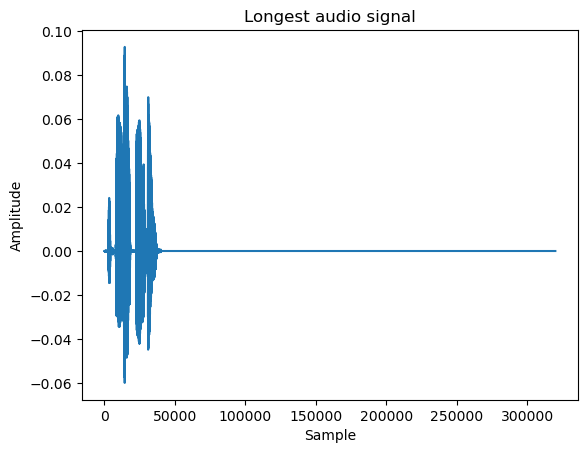

In [22]:
longest = np.argmax([len(data) for data in dataAudio])
plt.plot(dataAudio[longest])
plt.title("Longest audio signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
print(f"Duration of longest audio: {max([len(data) for data in dataAudio])/sr}")

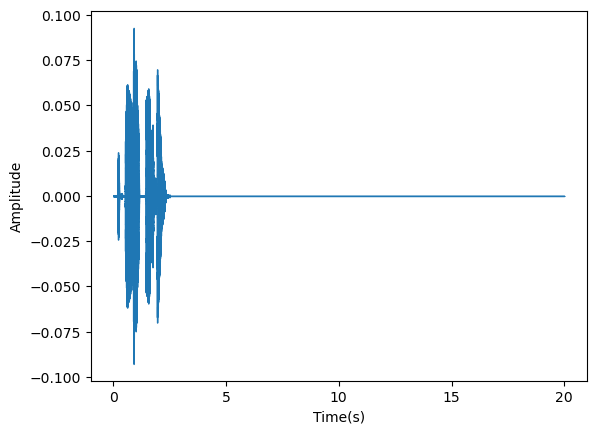

In [134]:
import librosa.display
plt.figure()
librosa.display.waveshow(dataAudio[longest], sr=sr)
plt.ylabel("Amplitude")
plt.xlabel("Time(s)")
plt.show()

### Shortest Audio Plot

Duration of shortest audio: 0.6501875


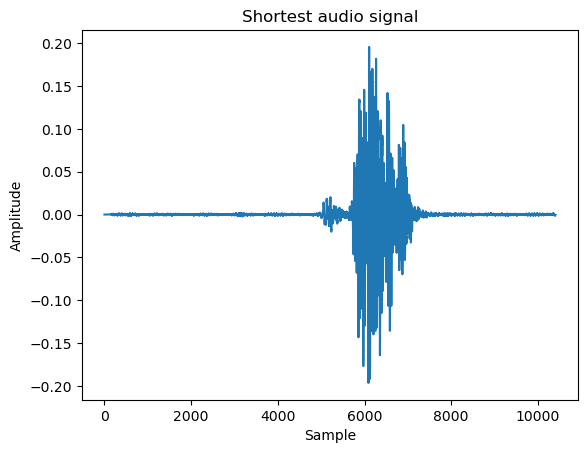

In [23]:
shortest = np.argmin([len(data) for data in dataAudio])
plt.plot(dataAudio[shortest])
plt.title("Shortest audio signal");
plt.xlabel("Sample")
plt.ylabel("Amplitude")
print(f"Duration of shortest audio: {min([len(data) for data in dataAudio])/sr}")

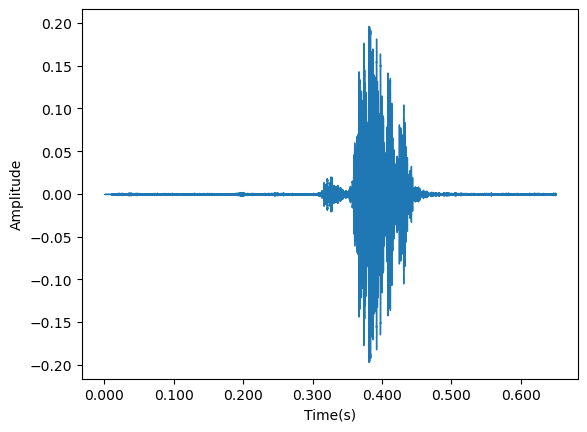

In [24]:
import librosa.display
plt.figure()
librosa.display.waveshow(dataAudio[shortest], sr=sr)
plt.ylabel("Amplitude")
plt.xlabel("Time(s)")
plt.show()

### Trimming all silences (maybe later)

```
fullTrimmedAudio = []
for i in trimmedAudio:
    clips = librosa.effects.split(i, top_db=20)
    concatdata = []
    for c in clips:
        data = i[c[0]: c[1]]
        concatdata.extend(data)
    fullTrimmedAudio.append(concatdata)

plt.hist([len(data)/srdesired for data in fullTrimmedAudio])
librosa.display.waveshow(trimmedAudio[np.argmax([len(i)/srdesired for i in fullTrimmedAudio])], sr=sr)
x = np.argmax([len(i)/srdesired for i in fullTrimmedAudio])
librosa.display.waveshow(np.array(fullTrimmedAudio[x]), sr=sr)
```

### Trimming the silences at the first and beginning

In [25]:
from librosa.effects import trim

In [26]:
trimmedAudio = []
for i in dataAudio:
    trimmed, n = trim(i,top_db=20)
    trimmedAudio.append(trimmed)

### Plot old longest audio after trim

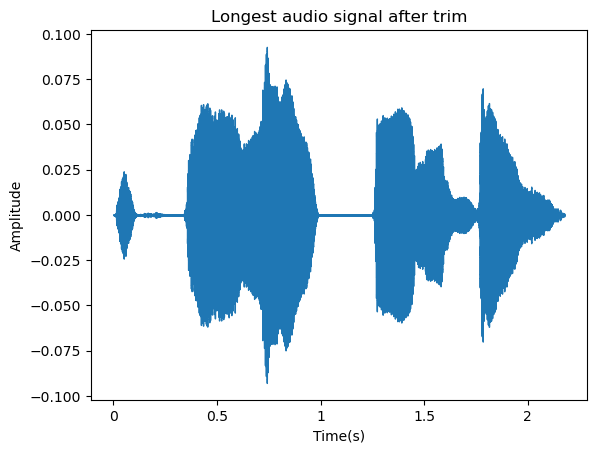

In [27]:
plt.figure()
librosa.display.waveshow(trimmedAudio[longest], sr=sr)
plt.ylabel("Amplitude")
plt.xlabel("Time(s)")
plt.title("Longest audio signal after trim")
plt.show()

### Plot old shortest audio after trim

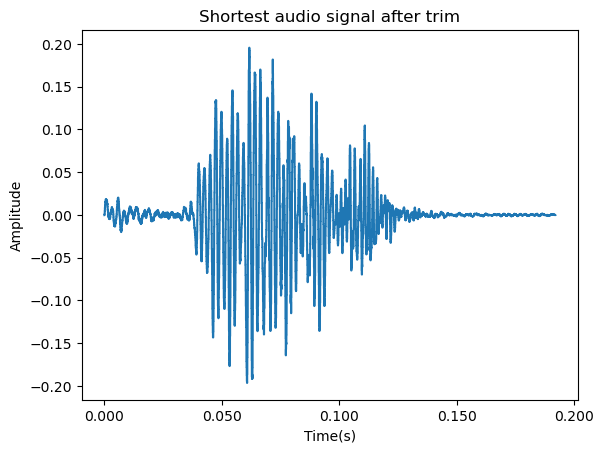

In [28]:
plt.figure()
librosa.display.waveshow(trimmedAudio[shortest], sr=sr)
plt.ylabel("Amplitude")
plt.xlabel("Time(s)")
plt.title("Shortest audio signal after trim")
plt.show()

### Distribution of durations in database after trim

(array([7.037e+03, 2.572e+03, 2.120e+02, 2.900e+01, 1.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.192 ,  1.2128,  2.2336,  3.2544,  4.2752,  5.296 ,  6.3168,
         7.3376,  8.3584,  9.3792, 10.4   ]),
 <BarContainer object of 10 artists>)

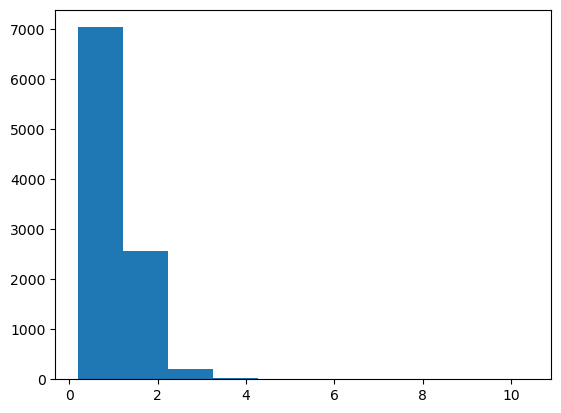

In [29]:
plt.hist([len(data)/srdesired for data in trimmedAudio])

### Plot new longest audio after trim

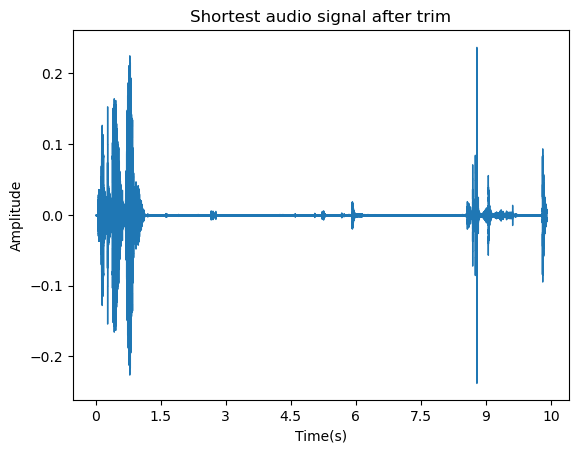

In [30]:
newShortest = np.argmax([len(data) for data in trimmedAudio])
plt.figure()
librosa.display.waveshow(trimmedAudio[newShortest], sr=sr)
plt.ylabel("Amplitude")
plt.xlabel("Time(s)")
plt.title("Shortest audio signal after trim")
plt.show()

### Audio mean and standard deviation from melspectrogram

### For development data

In [33]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

mean = []
stdev = []
for data in trimmedAudio:
    spectogram =  librosa.feature.melspectrogram(np.array(data),sr=srdesired) #n_mels=*, fmax=*
    mean.append(spectogram.mean())
    stdev.append(spectogram.std())

In [34]:
df.insert(1,"mean",mean)
df.insert(2,"standardDeviation",stdev)
df.drop("path",axis=1,inplace=True)

In [35]:
df

,mean,standardDeviation,Self-ReportedFluencyLevel,FirstLanguageSpoken,CurrentLanguageUsedForWork/School,gender,ageRange,intent
Id,,,,,,,,
0,0.119927,0.874224,otherFluency,English (United States),English (United States),female,22-40,change languagenone
1,0.079017,0.702146,otherFluency,English (United States),English (United States),female,22-40,activatemusic
2,0.018596,0.143269,otherFluency,English (United States),English (United States),female,22-40,deactivatelights
3,0.500107,2.272013,otherFluency,English (United States),English (United States),female,22-40,increasevolume
4,0.035164,0.292455,otherFluency,English (United States),English (United States),female,22-40,increasevolume
...,...,...,...,...,...,...,...,...
9849,2.146515,10.970642,native,English (United States),English (United States),male,22-40,decreasevolume
9850,1.229377,7.186619,native,English (United States),English (United States),male,22-40,deactivatelights
9851,1.782335,8.657359,native,English (United States),English (United States),male,22-40,deactivatelights


### Read and Trim audio files in Evaluation dataset

In [36]:
srdesired = 16000
dataAudioEva = []
sr_control = []
for i in range(len(dfEva)):
    data, sr = librosa.load("C:/Users/Koparan/Desktop/DataPolito/DataScienceLab/project/"+dfEva.iloc[i,0],sr=srdesired)
    dataAudioEva.append(data)

(array([117., 372., 561., 258.,  79.,  31.,  16.,  12.,   6.,   3.]),
 array([0.32  , 0.6048, 0.8896, 1.1744, 1.4592, 1.744 , 2.0288, 2.3136,
        2.5984, 2.8832, 3.168 ]),
 <BarContainer object of 10 artists>)

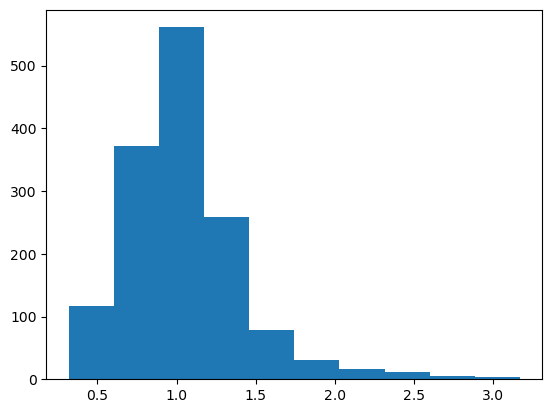

In [37]:
from librosa.effects import trim
trimmedAudioEva = []
for i in dataAudioEva:
    trimmed, n = trim(i,top_db=20)
    trimmedAudioEva.append(trimmed)
plt.hist([len(data)/srdesired for data in trimmedAudioEva])

In [38]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

mean = []
stdev = []
for data in trimmedAudioEva:
    spectogram =  librosa.feature.melspectrogram(np.array(data),sr=srdesired) #n_mels=*, fmax=*
    mean.append(spectogram.mean())
    stdev.append(spectogram.std())
dfEva.insert(1,"mean",mean)
dfEva.insert(2,"standardDeviation",stdev)
dfEva.drop("path",axis=1,inplace=True)

### Discretization of other attributes in evaluation data

In [39]:
dfEva["Self-ReportedFluencyLevel"].replace(to_replace=["advanced","intermediate","basic"],value=["otherFluency","otherFluency","otherFluency"],inplace=True)
dfEva["FirstLanguageSpoken"].replace(to_replace=["French (Canada)","Spanish (Venezuela)","Telugu","English (Canada)"],
           value=["otherFirstLanguage","otherFirstLanguage","otherFirstLanguage","otherFirstLanguage"],inplace=True)
dfEva["CurrentLanguageUsedForWork/School"].replace(to_replace=["English (Canada)","English (Australia)","Spanish (Venezuela)"],
                                                value=["otherCurrentLanguage","otherCurrentLanguage","otherCurrentLanguage"],inplace=True)
dfEva["ageRange"].replace(to_replace=["41-65","65+"],value=["40+","40+"],inplace=True)

### One hot encoding categorical features in Development dataset

In [40]:
from sklearn.preprocessing import OneHotEncoder
concatdf = pd.concat([df,dfEva])
indices = concatdf.index

encoder =  OneHotEncoder()
encoder.fit(concatdf.iloc[:,2:-1])
encodedData = encoder.transform(concatdf.iloc[:,2:-1]).toarray()
encodedColumns = encoder.get_feature_names_out()


concatdfEncoded = pd.concat([concatdf[["mean","standardDeviation"]].reset_index(drop=True), 
                            pd.DataFrame(encodedData,columns=encodedColumns,dtype=int).reset_index(drop=True),
                            concatdf[["intent"]].reset_index(drop=True)],axis=1).set_index(indices)

In [41]:
train = concatdfEncoded.iloc[:9854]
test = concatdfEncoded.iloc[9854:]
X_train, y_train = train.iloc[:,:-1], train.iloc[:,-1]
test.drop("intent",axis=1,inplace=True)
test

C:\Users\Koparan\AppData\Local\Temp\ipykernel_10368\1470605292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop("intent",axis=1,inplace=True)


,mean,standardDeviation,Self-ReportedFluencyLevel_native,Self-ReportedFluencyLevel_otherFluency,FirstLanguageSpoken_English (United States),FirstLanguageSpoken_otherFirstLanguage,CurrentLanguageUsedForWork/School_English (United States),CurrentLanguageUsedForWork/School_otherCurrentLanguage,gender_female,gender_male,ageRange_22-40,ageRange_40+
Id,,,,,,,,,,,,
0,4.106449,32.020515,1,0,1,0,1,0,0,1,1,0
1,4.344249,44.195473,1,0,1,0,1,0,0,1,1,0
2,0.480694,2.465507,1,0,1,0,1,0,0,1,0,1
3,2.046133,16.204554,1,0,1,0,1,0,0,1,1,0
4,3.460771,18.150892,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1450,2.709025,15.478873,1,0,1,0,1,0,1,0,1,0
1451,4.850363,26.275177,1,0,1,0,1,0,1,0,1,0
1452,5.927857,33.051769,1,0,1,0,1,0,1,0,0,1


### Predicting

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc = RandomForestClassifier()

In [44]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
y_predrfc = rfc.predict(test)

### Write to CSV

In [ ]:
pd.DataFrame(y_predrfc,index=test.index,columns=["Predicted"]).to_csv("deneme.csv")

### Feature Importance and Elimination

['0.496', '0.493', '0.001', '0.001', '0.000', '0.000', '0.001', '0.001', '0.002', '0.002', '0.002', '0.002']


Text(0, 0.5, 'Features in the Model')

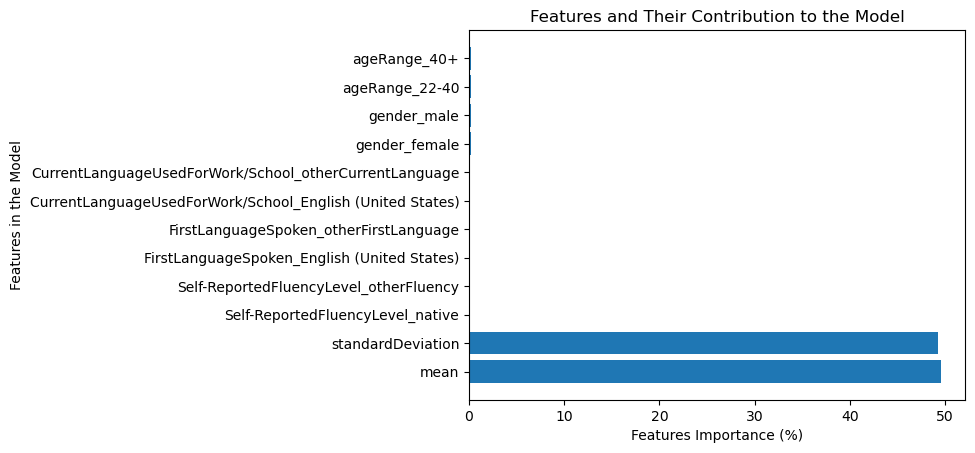

In [46]:
print([format(x,'.3f') for x in rfc.feature_importances_])
plt.barh(X_train.columns, 100*rfc.feature_importances_)
plt.title("Features and Their Contribution to the Model")
plt.xlabel("Features Importance (%)")
plt.ylabel("Features in the Model")
#mean and std has 98.9 importance as total in assigning intent. We eliminate others

In [47]:
from sklearn.model_selection import train_test_split
X_train = X_train[["mean","standardDeviation"]]
X_tr, X_ts, y_tr, y_ts = train_test_split(X_train,y_train,test_size=.2,stratify=y_train)

In [48]:
rfc = RandomForestClassifier()
rfc.fit(X_tr,y_tr)
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_ts,rfc.predict(X_ts)))

0.21258244545915778


### Melspectrogram bins

In [68]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def split_to_bin_melspectogram(audios, bins):
    audios_m_sd = []
    for data in audios:
        data_m_sd = []
        spectogram =  librosa.feature.melspectrogram(np.array(data),sr=srdesired)
        for b in np.array_split(spectogram,bins):
            data_m_sd.extend([b.mean(), b.std()])
        audios_m_sd.append(data_m_sd)
    return np.array(audios_m_sd)

In [69]:
binNumber = []
accforbin = []
for n in range(30,121,30):
    binNumber.append(n)
    mean_std_data = split_to_bin_melspectogram(trimmedAudio,n)
    X_tr, X_ts, y_tr, y_ts = train_test_split(mean_std_data,
                                              y_train,
                                              test_size=.2,
                                              stratify=y_train)
    rfc = RandomForestClassifier()
    rfc.fit(X_tr,y_tr)
    accforbin.append(accuracy_score(y_ts,rfc.predict(X_ts)))

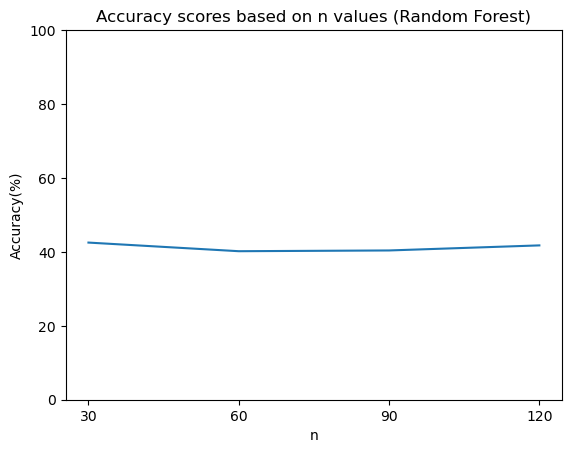

In [77]:
plt.plot(binNumber, np.array(accforbin)*100)
plt.xlabel("n")
plt.ylabel("Accuracy(%)")
plt.title("Accuracy scores based on n values (Random Forest)")
plt.ylim([0,100])
plt.xticks(np.arange(30, 121, 30))
plt.show()

In [71]:
from sklearn import svm
binNumberSVM = []
accforbinSVM = []
for n in range(30,121,30):
    binNumberSVM.append(n)
    mean_std_data = split_to_bin_melspectogram(trimmedAudio,n)
    X_tr, X_ts, y_tr, y_ts = train_test_split(mean_std_data,
                                              y_train,
                                              test_size=.2,
                                              stratify=y_train)
    svmac = svm.SVC()
    svmac.fit(X_tr,y_tr)
    accforbinSVM.append(accuracy_score(y_ts,svmac.predict(X_ts)))

[0.42516489091831555,
 0.4018264840182648,
 0.40385591070522575,
 0.41755454084221205]

In [133]:
params = {
    "n_estimators": [100,300,500],
    "criterion": ["gini","entropy"],
    "max_depth": [None, 5, 20],
    "min_samples_split": [2,10,50],
    "min_samples_leaf": [1,5,10]
}


from sklearn.model_selection import ParameterGrid
for param in ParameterGrid(params):
    rfc = RandomForestClassifier(**param)
    rfc.fit(X_tr,y_tr)
    print(f"{round(accuracy_score(y_ts,rfc.predict(X_ts)),2)} -->",end=" ")
    print(f"{list(param.values())}")
"""
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
grid_rfc = GridSearchCV(estimator=rfc, param_grid=params, cv=3, n_jobs=-1)
grid_rfc.fit(X_tr,y_tr)
"""
#48

0.6 --> ['gini', None, 1, 2, 100]
0.62 --> ['gini', None, 1, 2, 300]
0.62 --> ['gini', None, 1, 2, 500]
0.6 --> ['gini', None, 1, 10, 100]
0.62 --> ['gini', None, 1, 10, 300]
0.63 --> ['gini', None, 1, 10, 500]
0.56 --> ['gini', None, 1, 50, 100]
0.57 --> ['gini', None, 1, 50, 300]
0.57 --> ['gini', None, 1, 50, 500]
0.6 --> ['gini', None, 5, 2, 100]
0.6 --> ['gini', None, 5, 2, 300]
0.61 --> ['gini', None, 5, 2, 500]
0.59 --> ['gini', None, 5, 10, 100]
0.6 --> ['gini', None, 5, 10, 300]
0.6 --> ['gini', None, 5, 10, 500]
0.56 --> ['gini', None, 5, 50, 100]
0.56 --> ['gini', None, 5, 50, 300]
0.57 --> ['gini', None, 5, 50, 500]
0.57 --> ['gini', None, 10, 2, 100]
0.59 --> ['gini', None, 10, 2, 300]
0.59 --> ['gini', None, 10, 2, 500]
0.58 --> ['gini', None, 10, 10, 100]
0.59 --> ['gini', None, 10, 10, 300]
0.59 --> ['gini', None, 10, 10, 500]
0.55 --> ['gini', None, 10, 50, 100]
0.55 --> ['gini', None, 10, 50, 300]
0.56 --> ['gini', None, 10, 50, 500]
0.47 --> ['gini', 5, 1, 2, 100]
0.

KeyboardInterrupt: 

In [ ]:
grid_rfc.best_score_
grid_rfc.best_params_

In [ ]:
rfc = RandomForestClassifier(criterion='gini',
                             max_depth=5,
                             min_samples_leaf=5,
                             min_samples_split=2,
                             n_estimators= 100)
rfc.fit(X_tr,y_tr)
print(accuracy_score(y_ts,rfc.predict(X_ts)))

In [ ]:
from sklearn import svm

svmac = svm.SVC()
svmac.fit(X_tr,y_tr)
print(accuracy_score(y_ts,svmac.predict(X_ts)))

In [ ]:
params = {
    "C":  [],
    "kernel": ["linear", "rbf", "poly", "sigmoid"]
}

from sklearn.model_selection import ParameterGrid
for param in ParameterGrid(params):
    svmac = svm.SVC(**param)
    svmac.fit(X_tr,y_tr)
    print(f"{round(accuracy_score(y_ts,svmac.predict(X_ts)),2)} -->",end=" ")
    print(f"{list(param.values())}")

### Preprocessing of Audio Files

### Decibel transform

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from librosa import power_to_db

audio_db = []
for data in trimmedAudio:
    db = power_to_db(librosa.feature.melspectrogram(data, n_fft=len(data)), np.mean)
    data_db = []
    for vertical in np.array_split(db, 5, axis = 0):
        for horizontal in np.array_split(vertical, 5, axis = 1):
            if horizontal.size == 0: #happens when number of culumns < n
                mn = np.median(vertical)
                stdv = np.std(vertical)
            else:
                mn = np.mean(horizontal)
                stdv = np.std(horizontal)
            data_db.extend([mn,stdv])
    audio_db.append(data_db)

In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(audio_db, y_train, test_size=.2, stratify=y_train)

In [ ]:
rfc = RandomForestClassifier(criterion='entropy',
                             max_depth=5,
                             min_samples_leaf=5,
                             min_samples_split=10,
                             n_estimators= 300)
rfc.fit(X_tr,y_tr)
print(accuracy_score(y_ts,rfc.predict(X_ts)))

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(audio_db,
                                          y_train,
                                          test_size=.2,
                                          stratify=y_train)

In [ ]:
svmac = svm.SVC(C=10,kernel='rbf')
svmac.fit(X_tr,y_tr)

In [ ]:
print(accuracy_score(y_ts,svmac.predict(X_ts)))

In [ ]:
svmac.fit(audio_db, y_train)

In [ ]:
from librosa import power_to_db

audio_dbEva = []
for data in trimmedAudioEva:
    db = power_to_db(librosa.feature.melspectrogram(data, n_fft=len(data)), np.mean)
    data_db = []
    for vertical in np.array_split(db, 5, axis = 0):
        for horizontal in np.array_split(vertical, 5, axis = 1):
            if horizontal.size == 0: #happens when number of culumns < n
                mn = np.median(vertical)
                stdv = np.std(vertical)
            else:
                mn = np.mean(horizontal)
                stdv = np.std(horizontal)
            data_db.extend([mn,stdv])
    audio_dbEva.append(data_db)

In [ ]:
y_predDbSVM = svmac.predict(audio_dbEva)

In [ ]:
pd.DataFrame(y_predDbSVM,index=test.index,columns=["Predicted"]).to_csv("deneme2.csv")

### MFCC transform

In [115]:
audio_mfcc = []
for data in trimmedAudio:
    mfcc = librosa.feature.mfcc(y=data,sr=srdesired)
    data_mfcc = []
    for vertical in np.array_split(mfcc, 20, axis = 0):
        for horizontal in np.array_split(vertical, 20, axis = 1):
            if horizontal.size == 0: #happens when number of culumns < n
                mn = np.median(vertical)
                stdv = np.std(vertical)
            else:
                mn = np.mean(horizontal)
                stdv = np.std(horizontal)
            data_mfcc.extend([mn,stdv])
    audio_mfcc.append(data_mfcc)

In [116]:
data = np.asarray(audio_mfcc)
np.save('audio_mfcc_n20.npy', data)

In [121]:
audio_mfcc = np.load("audio_mfcc_n20.npy")
from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(audio_mfcc, y_train, test_size=.2, stratify=y_train)

In [122]:
rfc = RandomForestClassifier(criterion='entropy',
                             max_depth=5,
                             min_samples_leaf=5,
                             min_samples_split=10,
                             n_estimators= 300)
rfc.fit(X_tr,y_tr)
print(accuracy_score(y_ts,rfc.predict(X_ts)))

0.4764079147640791


In [123]:
from sklearn import svm
X_tr, X_ts, y_tr, y_ts = train_test_split(audio_mfcc,
                                          y_train,
                                          test_size=.2,
                                          stratify=y_train)


In [124]:
svmac = svm.SVC(C=10,kernel='rbf')
svmac.fit(X_tr,y_tr)

SVC(C=10)

In [125]:
print(accuracy_score(y_ts,svmac.predict(X_ts)))

0.7843734145104008


In [129]:
#predict real evaluation
svmac.fit(audio_mfcc, y_train)

SVC(C=10)

In [130]:
audio_mfccEva = []
for data in trimmedAudioEva:
    mfcc = librosa.feature.mfcc(y=data,sr=srdesired)
    data_mfccEva = []
    for vertical in np.array_split(mfcc, 20, axis = 0):
        for horizontal in np.array_split(vertical, 20, axis = 1):
            if horizontal.size == 0: #happens when number of culumns < n
                mn = np.median(vertical)
                stdv = np.std(vertical)
            else:
                mn = np.mean(horizontal)
                stdv = np.std(horizontal)
            data_mfccEva.extend([mn,stdv])
    audio_mfccEva.append(data_mfccEva)

In [131]:
y_predMFCC_SVM = svmac.predict(audio_mfccEva)

In [132]:
pd.DataFrame(y_predMFCC_SVM,index=test.index,columns=["Predicted"]).to_csv("deneme3.csv")

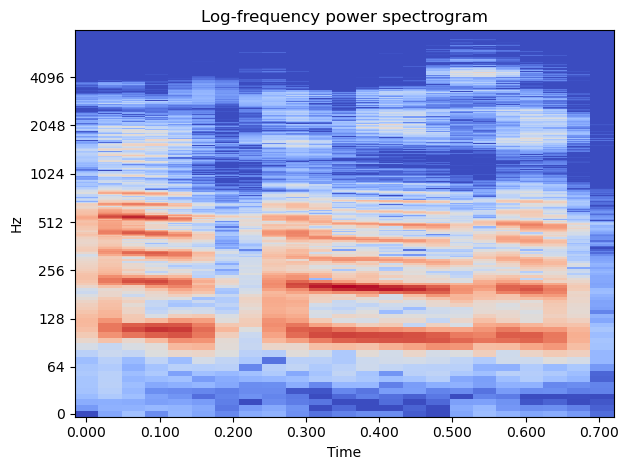

In [82]:
D = librosa.stft(data)
magnitude, phase = librosa.magphase(D)
db = 20*librosa.amplitude_to_db(magnitude)
plt.figure()
librosa.display.specshow(db, sr=16000, x_axis='time',y_axis='log')
plt.title("Log-frequency power spectrogram")
plt.tight_layout()
plt.show()